# Imports

In [7]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [8]:
df = pd.read_csv('../data/train.csv')
df.head(10)

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0,2.3,49.0
5,1198.5,42.41,2607.5000,-112.0,9.999747,0,3,0,0,4.2,49.0
6,903.5,67.50,1092.9950,-168.0,9.999747,0,3,0,0,-0.2,38.0
7,1173.0,41.93,2632.0000,-112.0,9.999747,0,3,0,0,4.8,49.0
8,1237.5,76.83,0.0000,-196.0,9.999747,0,3,0,0,-0.6,38.0
9,912.5,68.04,1637.5720,-140.0,9.999747,0,3,0,0,0.6,38.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Epm_nEng_100ms              8496 non-null   float64
 1   VehV_v_100ms                8496 non-null   float64
 2   ActMod_trqInr_100ms         8496 non-null   float64
 3   RngMod_trqCrSmin_100ms      8496 non-null   float64
 4   CoVeh_trqAcs_100ms          8496 non-null   float64
 5   Clth_st_100ms               8496 non-null   int64  
 6   CoEng_st_100ms              8496 non-null   int64  
 7   Com_rTSC1VRVCURtdrTq_100ms  8496 non-null   int64  
 8   Com_rTSC1VRRDTrqReq_100ms   8496 non-null   int64  
 9   RoadSlope_100ms             8496 non-null   float64
 10  Vehicle_Mass                8496 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 730.3 KB


Vậy không có cột nào có missing values

# Explorary Data Analysis

**1.Outliers**

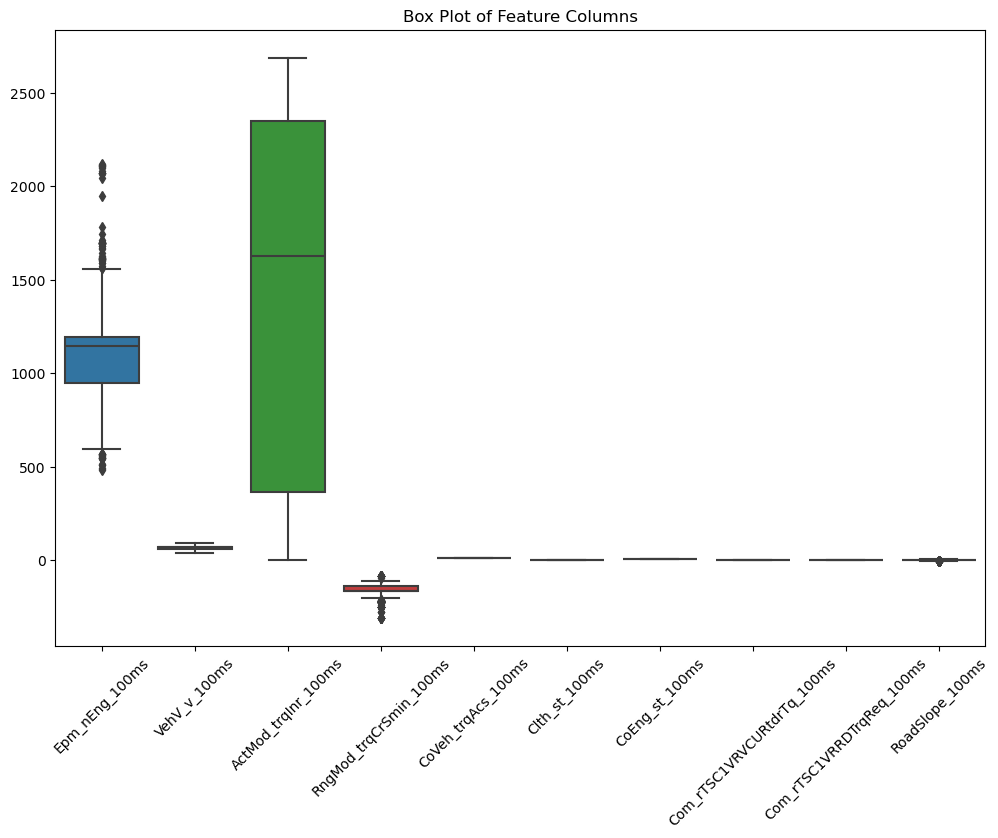

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Vehicle_Mass"]))  # Excluding the label column
plt.xticks(rotation=45)
plt.title("Box Plot of Feature Columns")
plt.savefig('/CS116_FinalProject/report/imgs/outliers.png')
plt.show()

**2.Unique Value**

After Outliner Analysis, use Unique to check Values in some features.

In [5]:
unique_checking = ['CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms', 'Vehicle_Mass']
for col in unique_checking:
    print(f'Unique Values in {col}: {df[col].unique()}')

Unique Values in CoVeh_trqAcs_100ms: [9.999747]
Unique Values in Clth_st_100ms: [0]
Unique Values in CoEng_st_100ms: [3]
Unique Values in Com_rTSC1VRVCURtdrTq_100ms: [0]
Unique Values in Com_rTSC1VRRDTrqReq_100ms: [0]
Unique Values in Vehicle_Mass: [38. 49.]


**3.Correlation**

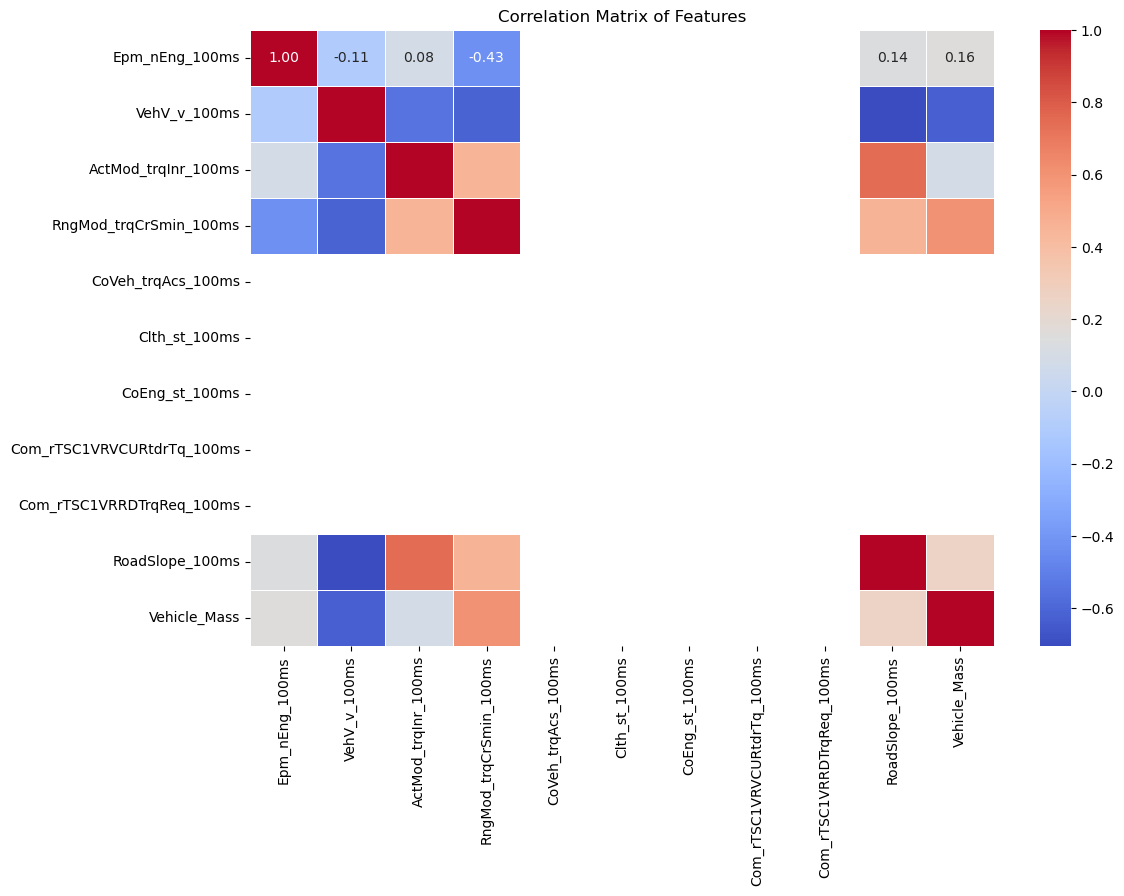

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.savefig('/CS116_FinalProject/report/imgs/corr.png')
plt.title('Correlation Matrix of Features')
plt.show()

In [83]:
corr_summary = corr_matrix[['RoadSlope_100ms', 'Vehicle_Mass']].sort_values(by='RoadSlope_100ms', ascending=False)
corr_summary

,RoadSlope_100ms,Vehicle_Mass
RoadSlope_100ms,1.000000,0.257673
ActMod_trqInr_100ms,0.743515,0.084114
RngMod_trqCrSmin_100ms,0.459027,0.604168
Vehicle_Mass,0.257673,1.000000
Epm_nEng_100ms,0.138132,0.156700
VehV_v_100ms,-0.705378,-0.630015
CoVeh_trqAcs_100ms,NaN,NaN
Clth_st_100ms,NaN,NaN
CoEng_st_100ms,NaN,NaN
Com_rTSC1VRVCURtdrTq_100ms,NaN,NaN


**4.Distribution**

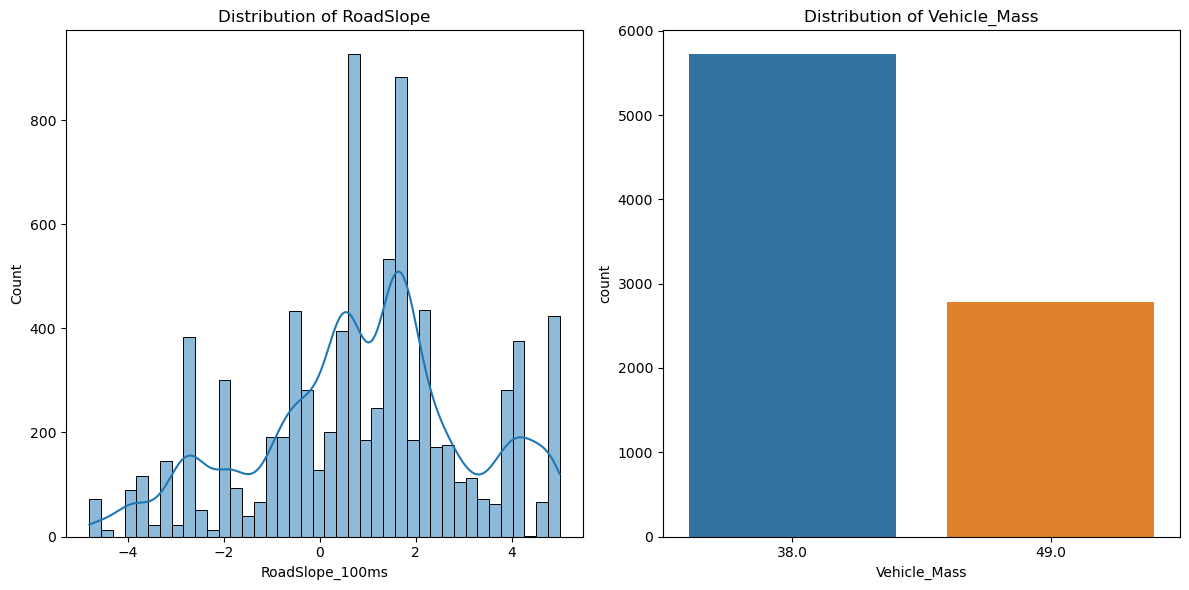

In [12]:
# RoadSlope
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['RoadSlope_100ms'], kde=True)
plt.title('Distribution of RoadSlope')

# Vehicle_Mass
plt.subplot(1, 2, 2)
sns.countplot(x='Vehicle_Mass', data=df)
plt.title('Distribution of Vehicle_Mass')

plt.tight_layout()
plt.savefig('/CS116_FinalProject/report/imgs/distri1')
plt.show()

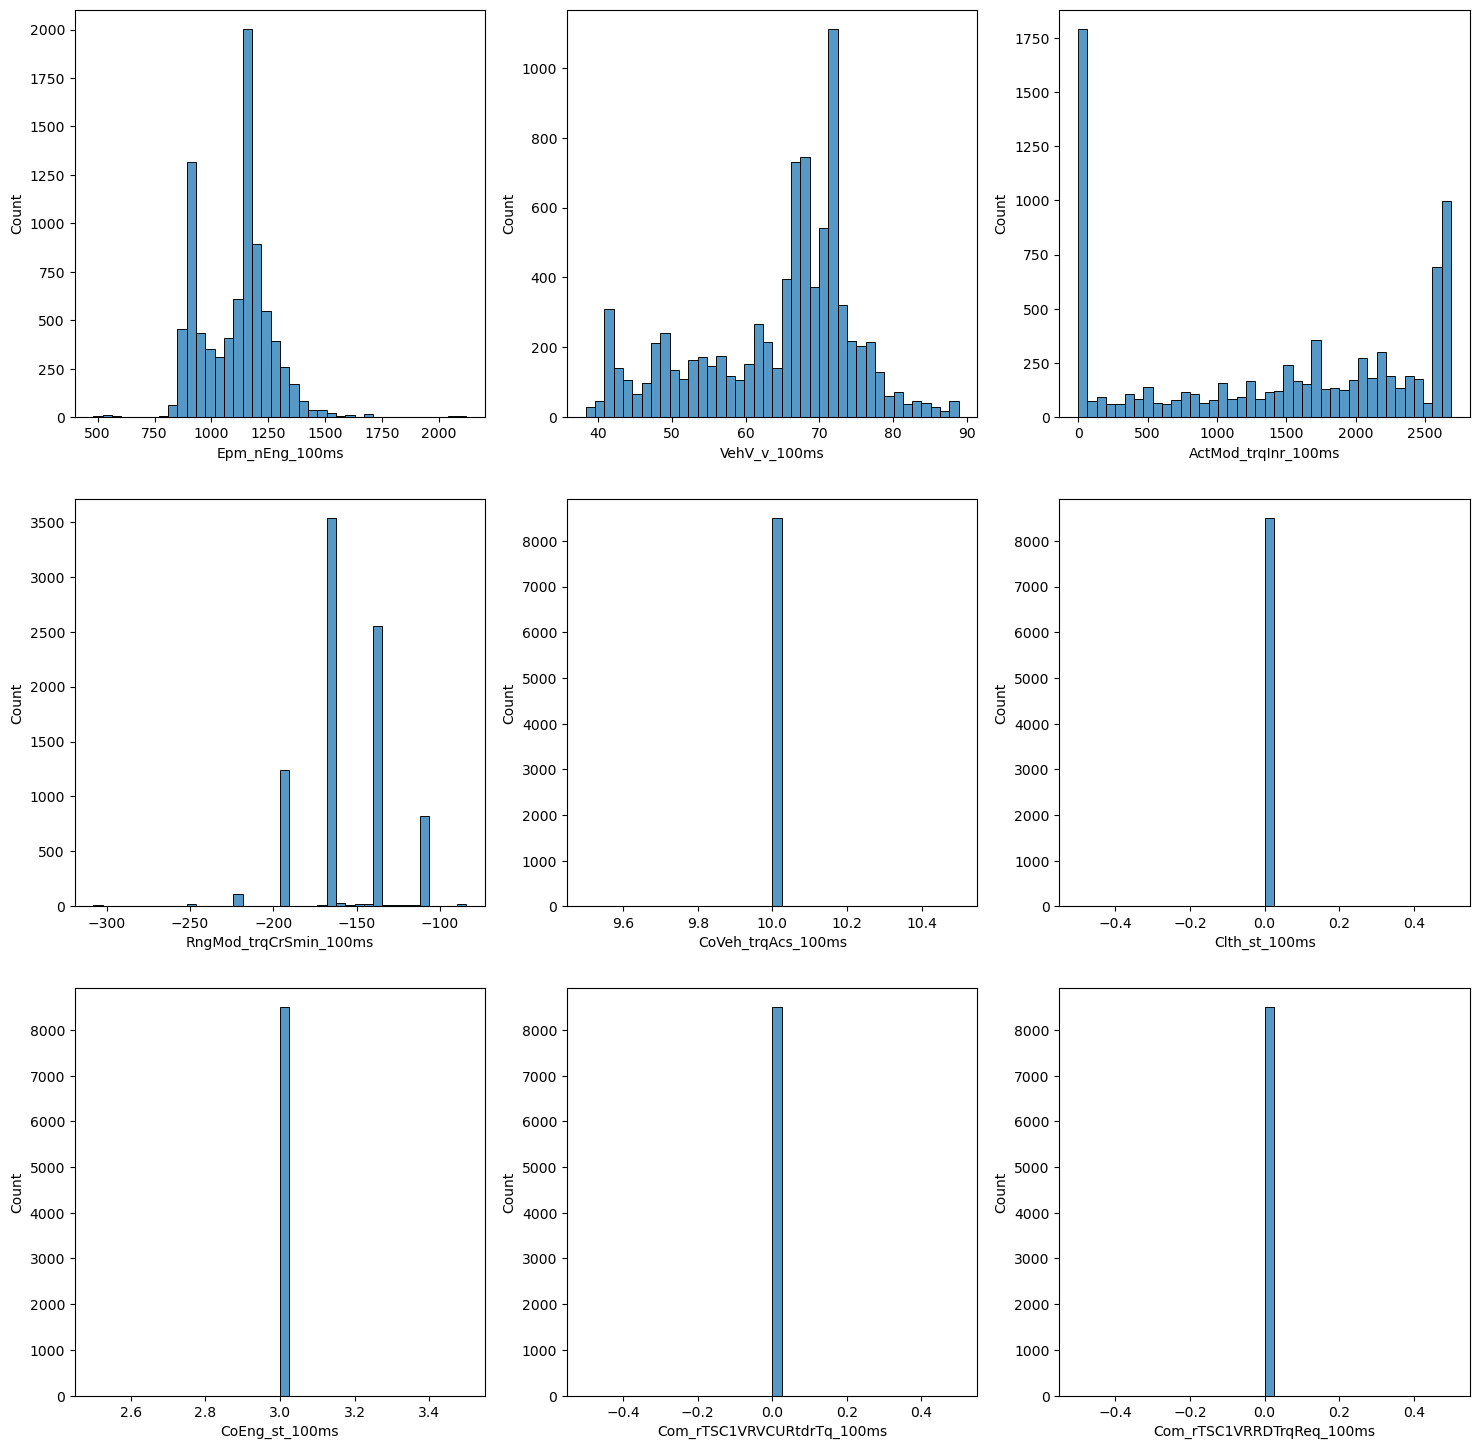

In [13]:
features = df.drop(['RoadSlope_100ms', 'Vehicle_Mass'], axis=1)
cols = features.columns
fig, ax = plt.subplots(3,3,figsize=(18, 18))
index = 0

ax = ax.flatten()

for index in range(len(cols)):
    sns.histplot(data=df,x=cols[index], bins=40, ax=ax[index])
    
plt.savefig('/CS116_FinalProject/report/imgs/distri2')
plt.show()

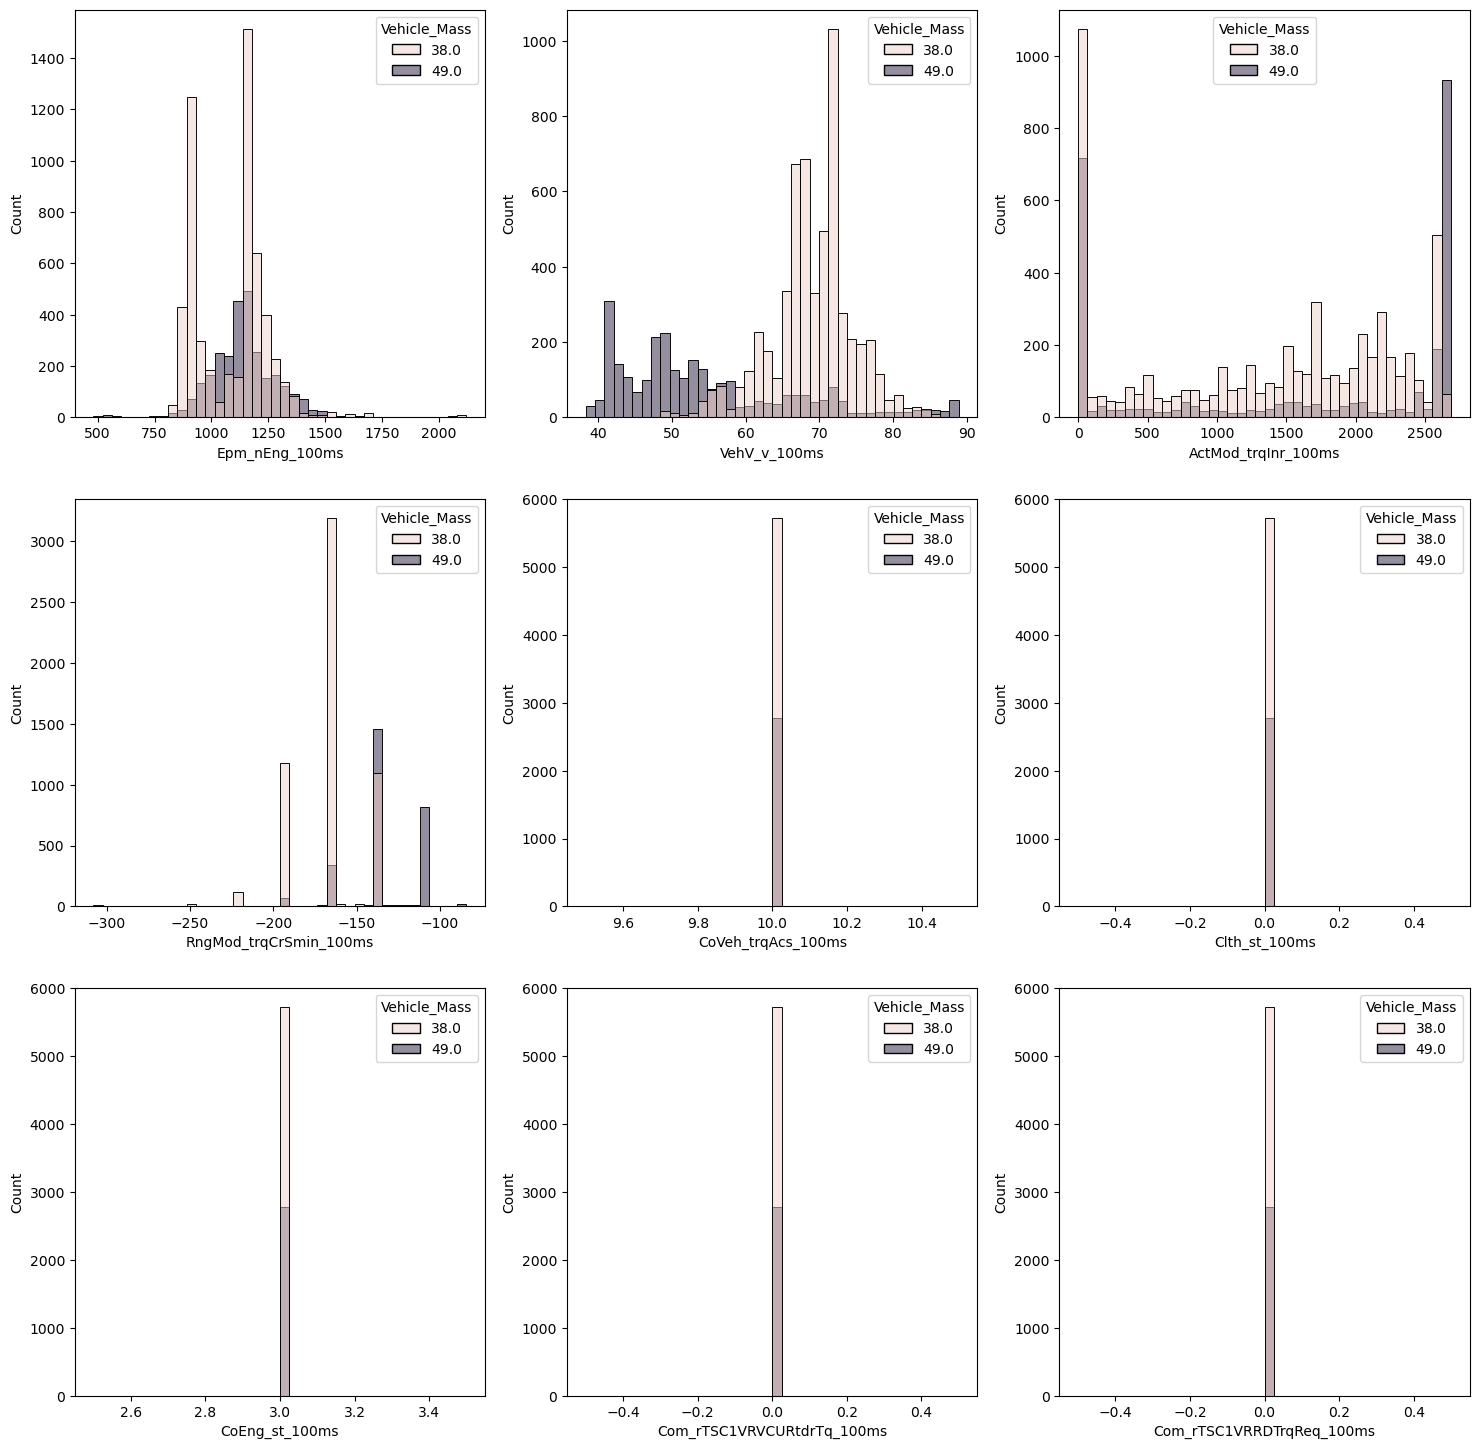

In [58]:
features = df.drop(['RoadSlope_100ms', 'Vehicle_Mass'], axis=1)
cols = features.columns
fig, ax = plt.subplots(3,3,figsize=(18, 18))
index = 0

ax = ax.flatten()

for index in range(len(cols)):
    sns.histplot(data=df,x=cols[index], hue='Vehicle_Mass', bins=40, ax=ax[index])

plt.show()

<Axes: xlabel='RoadSlope_100ms', ylabel='count'>

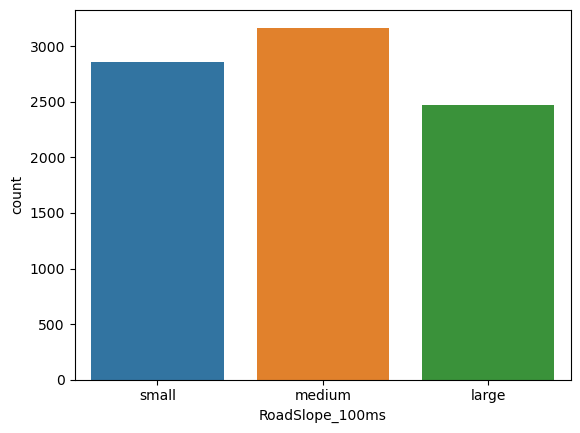

In [24]:
labels = ['small', 'medium', 'large']
bins = pd.qcut(df['RoadSlope_100ms'], 3, labels=labels)
sns.countplot(x=bins)

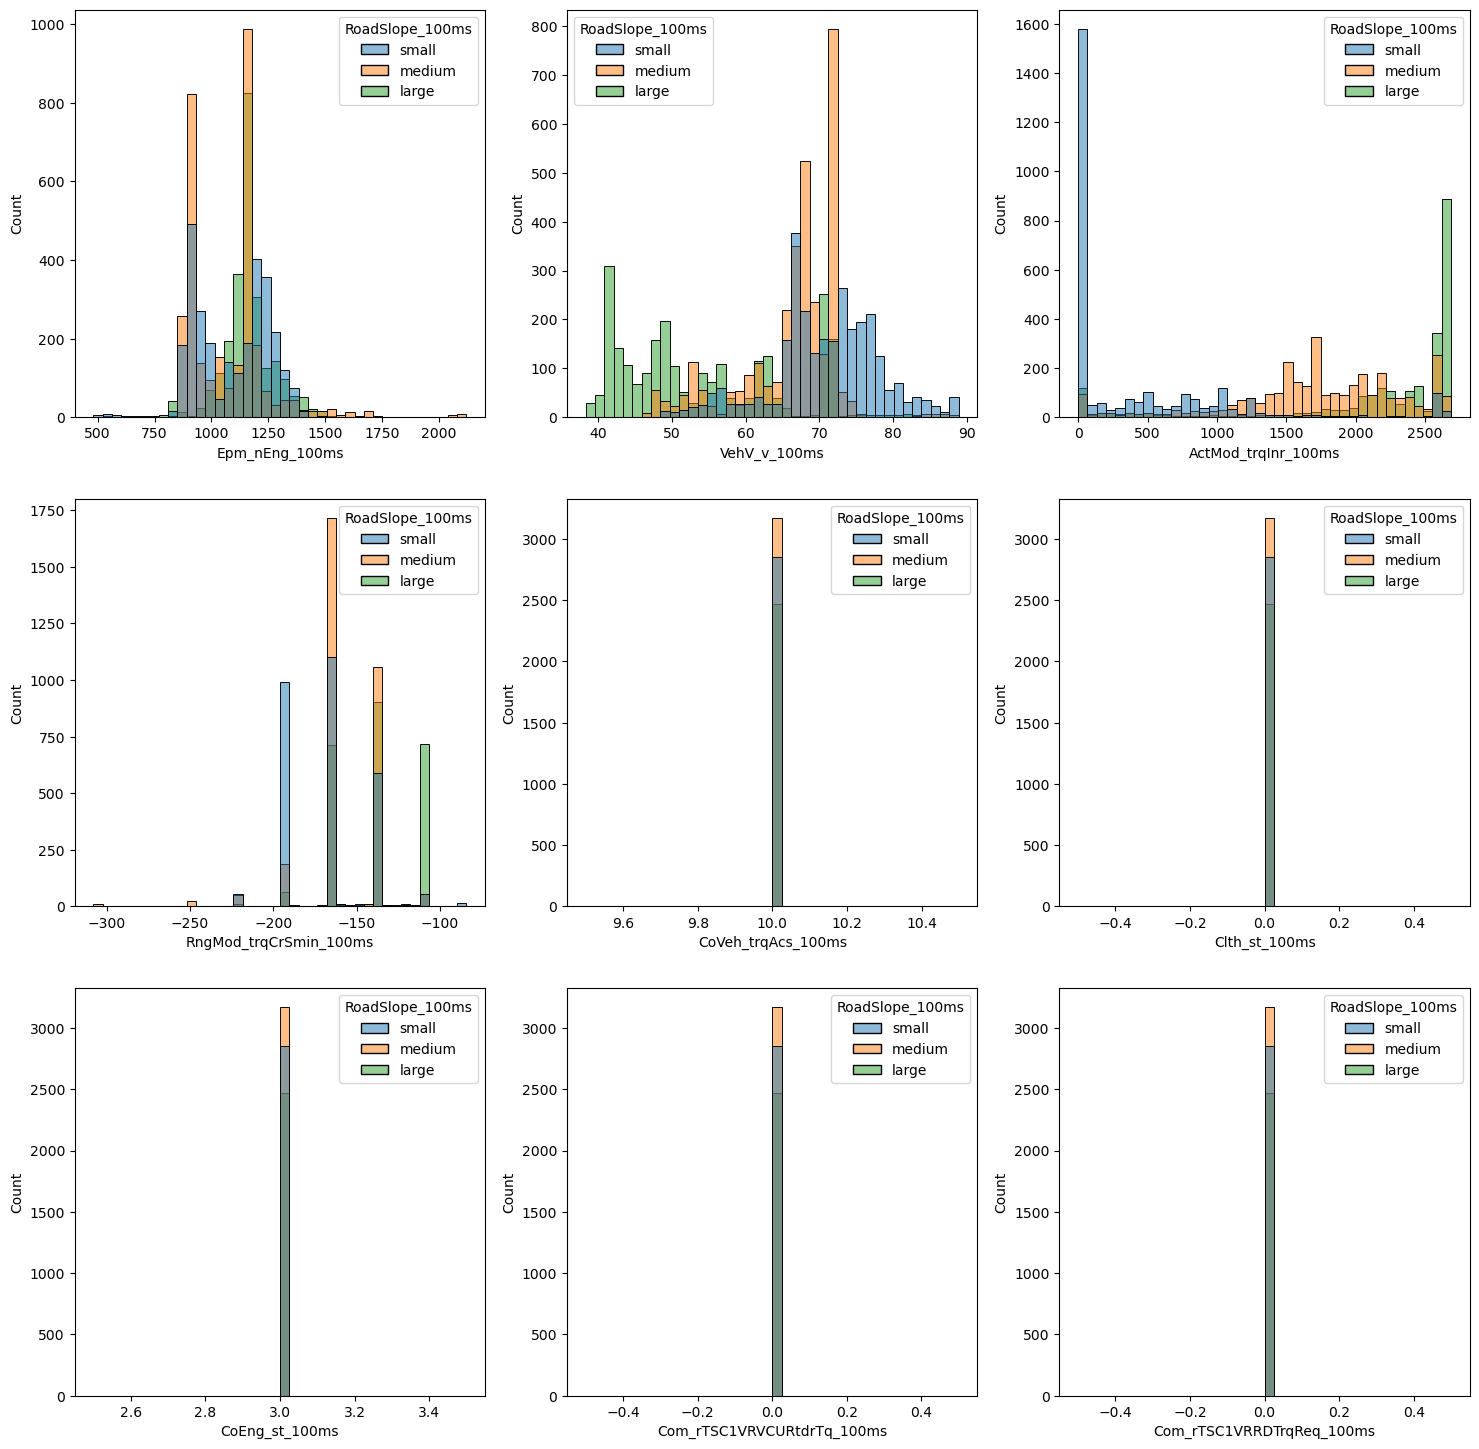

In [25]:
features = df.drop(['RoadSlope_100ms', 'Vehicle_Mass'], axis=1)
cols = features.columns
fig, ax = plt.subplots(3,3,figsize=(18, 18))
index = 0

ax = ax.flatten()

for index in range(len(cols)):
    sns.histplot(data=df,x=cols[index], hue=bins, bins=40, ax=ax[index])

plt.show()

**5. Other**

In [17]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
count,8496.000000,8496.000000,8496.000000,8496.000000,8.496000e+03,8496.0,8496.0,8496.0,8496.0,8496.000000,8496.000000
mean,1104.671257,64.349988,1419.595527,-158.917143,9.999747e+00,0.0,3.0,0.0,0.0,0.877949,41.595457
std,157.267374,10.691505,989.412153,26.449961,3.481864e-13,0.0,0.0,0.0,0.0,2.201932,5.160024
min,481.500000,38.310000,0.000000,-308.000000,9.999747e+00,0.0,3.0,0.0,0.0,-4.800000,38.000000
25%,948.375000,57.092500,363.923300,-168.000000,9.999747e+00,0.0,3.0,0.0,0.0,-0.400000,38.000000
50%,1145.000000,67.375000,1627.500000,-168.000000,9.999747e+00,0.0,3.0,0.0,0.0,1.000000,38.000000
75%,1192.500000,71.580000,2348.739000,-140.000000,9.999747e+00,0.0,3.0,0.0,0.0,2.100000,49.000000
max,2119.500000,88.930000,2688.000000,-84.000000,9.999747e+00,0.0,3.0,0.0,0.0,5.000000,49.000000


In [19]:
#Missing  value
missing_values = df.isnull().sum()
missing_values

Epm_nEng_100ms                0
VehV_v_100ms                  0
ActMod_trqInr_100ms           0
RngMod_trqCrSmin_100ms        0
CoVeh_trqAcs_100ms            0
Clth_st_100ms                 0
CoEng_st_100ms                0
Com_rTSC1VRVCURtdrTq_100ms    0
Com_rTSC1VRRDTrqReq_100ms     0
RoadSlope_100ms               0
Vehicle_Mass                  0
dtype: int64

# Preprocessing

Bỏ 5 features chỉ chứa một loại giá trị

In [9]:
df_preprocess = df.copy()
df_preprocess = df_preprocess.drop(['CoVeh_trqAcs_100ms','Clth_st_100ms', 'CoEng_st_100ms',
                         'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms'], axis=1)

Xử lý outliers của Epm_nEng_100ms, RngMod_trqCrSmin_100ms, RoadSlope_100ms

In [10]:
from scipy.stats.mstats import winsorize

# Áp dụng winsorizing cho feature
df_preprocess['Epm_nEng_100ms'] = winsorize(df_preprocess['Epm_nEng_100ms'], limits=[0.004, 0.007])
df_preprocess['RngMod_trqCrSmin_100ms'] = winsorize(df_preprocess['RngMod_trqCrSmin_100ms'], limits=[0.05, 0.05])
#df_preprocess['RoadSlope_100ms'] = winsorize(df_preprocess['RoadSlope_100ms'], limits=[0.015, 0.015])

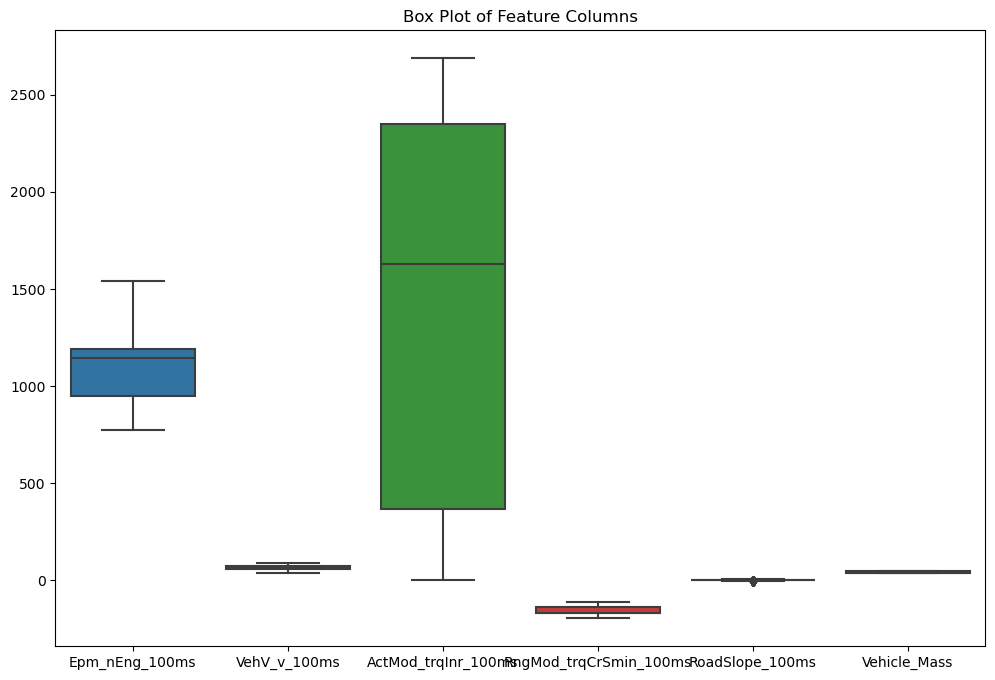

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_preprocess) 
plt.title("Box Plot of Feature Columns")
plt.savefig('/CS116_FinalProject/report/imgs/rmouliers.png')
plt.show()

Text(0.5, 1.0, 'Distribution of RoadSlope')

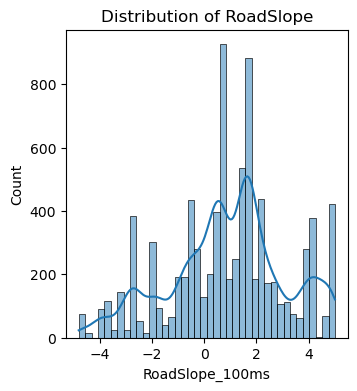

In [12]:
# RoadSlope
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_preprocess['RoadSlope_100ms'], kde=True)
plt.title('Distribution of RoadSlope')

Đưa giá trị của 'Vehicle_Mass' về 0 và 1

In [13]:
original_vm = df_preprocess['Vehicle_Mass']
df_preprocess['Vehicle_Mass'] = df_preprocess['Vehicle_Mass'].map({38: 0, 49: 1})
df_preprocess['Vehicle_Mass']

0       0
1       0
2       0
3       1
4       1
       ..
8491    1
8492    1
8493    0
8494    0
8495    0
Name: Vehicle_Mass, Length: 8496, dtype: int64

Chọn labels và features

In [14]:
#X_slope = df_preprocess.drop(['RoadSlope_100ms', 'Vehicle_Mass'], axis=1)
X_slope = df_preprocess.drop('RoadSlope_100ms', axis=1)
y_slope = df_preprocess['RoadSlope_100ms']

X_mass = df_preprocess.drop(['RoadSlope_100ms', 'Vehicle_Mass'], axis=1)
y_mass = df_preprocess['Vehicle_Mass']

Chia dữ liệu thành Train, Development, Test Set

In [15]:
from sklearn.model_selection import train_test_split

X_slope_train, X_slope_temp, y_slope_train, y_slope_temp = train_test_split(X_slope, y_slope, test_size=0.3, random_state=42)
X_slope_dev, X_slope_test, y_slope_dev, y_slope_test = train_test_split(X_slope_temp, y_slope_temp, test_size=0.5, random_state=42)

X_mass_train, X_mass_temp, y_mass_train, y_mass_temp = train_test_split(X_mass, y_mass, test_size=0.3, random_state=42)
X_mass_dev, X_mass_test, y_mass_dev, y_mass_test = train_test_split(X_mass_temp, y_mass_temp, test_size=0.5, random_state=42)

In [16]:
split_sizes_slope = (X_slope_train.shape, X_slope_dev.shape, X_slope_test.shape)
split_sizes_mass = (X_mass_train.shape, X_mass_dev.shape, X_mass_test.shape)
split_sizes_slope, split_sizes_mass

(((5947, 5), (1274, 5), (1275, 5)), ((5947, 4), (1274, 4), (1275, 4)))

Transform Data: Scaling

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler_slope = StandardScaler()
scaler_mass = StandardScaler()

X_slope_train_scaled = scaler_slope.fit_transform(X_slope_train)
X_mass_train_scaled = scaler_mass.fit_transform(X_mass_train)

# Transform the development and test data with the same scaler
X_slope_dev_scaled = scaler_slope.transform(X_slope_dev)
X_slope_test_scaled = scaler_slope.transform(X_slope_test)

X_mass_dev_scaled = scaler_mass.transform(X_mass_dev)
X_mass_test_scaled = scaler_mass.transform(X_mass_test)

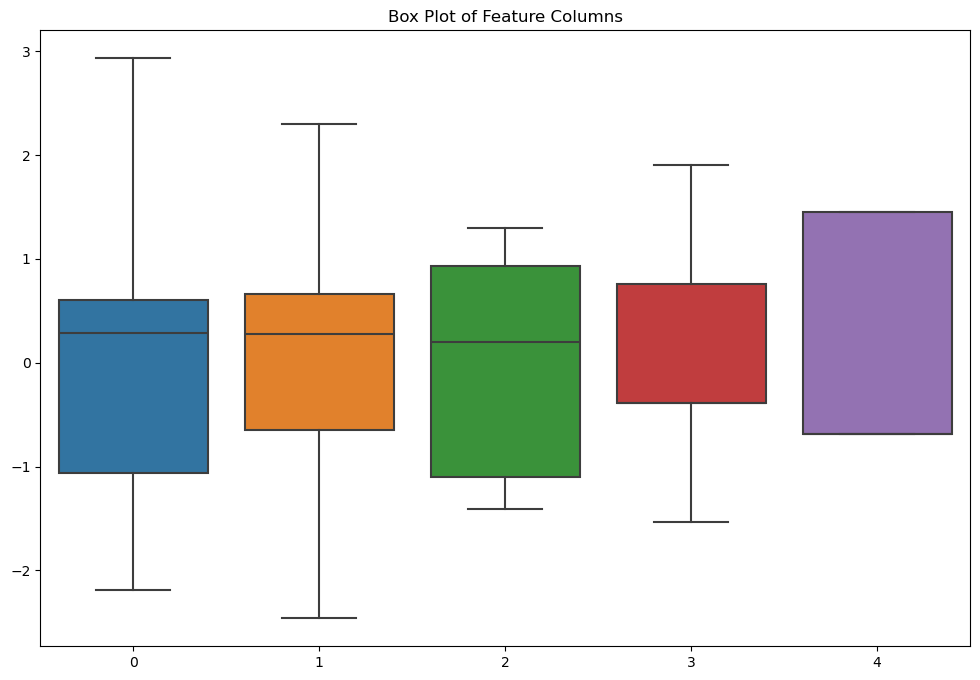

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_slope_train_scaled) 
plt.title("Box Plot of Feature Columns")
plt.show()

In [19]:
X_slope_train.head(5)

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,Vehicle_Mass
6289,1142.0,70.69,2215.500,-168.0000,0
926,1111.0,47.96,2635.500,-112.0000,1
3816,1157.0,41.31,2632.000,-112.0000,1
2470,888.0,65.94,451.500,-168.0000,0
15,1022.0,53.08,1522.296,-133.2038,1


In [20]:
pd.DataFrame(X_slope_train_scaled).head(5)

,0,1,2,3,4
0,0.264076,0.580879,0.822090,-0.386037,-0.688105
1,0.056888,-1.554677,1.245664,1.904704,1.453266
2,0.364328,-2.179465,1.242134,1.904704,1.453266
3,-1.433528,0.134601,-0.956920,-0.386037,-0.688105
4,-0.537942,-1.073636,0.122988,1.037339,1.453266


In [21]:
y_slope_train.head(5)

6289    2.1
926     4.0
3816    4.2
2470   -0.8
15      1.7
Name: RoadSlope_100ms, dtype: float64

# Model Training

Vehicle Mass 

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initial
svc_classifier = SVC(probability=True)
logistic_classifier = LogisticRegression()
randomforest_classifier = RandomForestClassifier(random_state=42)

models_classify = {
    'SVC': svc_classifier,
    'Logistic Regression': logistic_classifier,
    'Random Forest Classification': randomforest_classifier
}

In [550]:
# Unscaled
mass_dev_scores = {}
for model_name, model in models_classify.items():
    model.fit(X_mass_train, y_mass_train)

    # Predict on the dev set
    y_mass_dev_pred = model.predict(X_mass_dev)
    # Calculate the score for the development set
    mass_dev_score = calc_mass_score(y_mass_dev, y_mass_dev_pred)
    
    mass_dev_scores[model_name] = mass_dev_score

In [552]:
mass_dev_scores

{'SVC': 0.8822904134418413,
 'Logistic Regression': 0.9761943540660225,
 'Random Forest Classification': 0.9993908010400188}

In [15]:
# Scaled
mass_dev_scaled_scores = {}
for model_name, model in models_classify.items():
    model.fit(X_mass_train_scaled, y_mass_train)

    # Predict on the dev set
    y_mass_dev_pred = model.predict(X_mass_test_scaled)
    # Calculate the score for the development set
    mass_dev_scaled_score = calc_mass_score(y_mass_test, y_mass_dev_pred)
    
    mass_dev_scaled_scores[model_name] = mass_dev_scaled_score

In [16]:
mass_dev_scaled_scores

{'SVC': 0.9904148405901059,
 'Logistic Regression': 0.9499788669750276,
 'Random Forest Classification': 1.0}

In [287]:
mapping_dict = {0: 38, 1: 49}
vectorized_map = np.vectorize(lambda x: mapping_dict[x])
y_mass_dev_pred_mapped = vectorized_map(y_mass_dev_pred)
y_mass_dev_pred_mapped

array([38, 38, 38, ..., 49, 49, 49])

Road Slope

In [23]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

#Inital
svr_regressor = SVR()
linear_regressor = LinearRegression()
#randomforest_regressor = RandomForestRegressor(random_state=42)
decisiontree_regressor = DecisionTreeRegressor(random_state=42)

models_regress = {
    'SVR': svr_regressor,
    'Linear Regression': linear_regressor,
    #'Random Forest Regression': randomforest_regressor
    'Decision Tree Regression': decisiontree_regressor
}

In [205]:
# Unscaled
slope_dev_scores = {}
for model_name, model in models_regress.items():
    # Train the model
    model.fit(X_slope_train, y_slope_train)
    # Predict on the development set
    y_dev_pred = model.predict(X_slope_dev)
    # Calculate the score for the development set
    slope_dev_score = calc_slope_score(y_dev_pred, y_slope_dev)
    # Store the score
    slope_dev_scores[model_name] = slope_dev_score

In [104]:
slope_dev_scores

{'SVR_linear': -0.4230769230769231,
 'SVR_rbf': -0.38873626373626374,
 'Linear Regression': -0.4044348508634223,
 'Random Forest Regression': 0.07123233908948194}

In [19]:
# Scaled
slope_dev_scaled_scores= {}
for model_name, model in models_regress.items():
    # Train the model
    model.fit(X_slope_train_scaled, y_slope_train)
    # Predict on the development set
    y_dev_pred = model.predict(X_slope_dev_scaled)
    # Calculate the score for the development set
    slope_dev_scaled_score = calc_slope_score(y_dev_pred, y_slope_dev)
    # Store the score
    slope_dev_scaled_scores[model_name] = slope_dev_scaled_score

In [23]:
slope_dev_scaled_scores, mean_absolute_error(y_dev_pred, y_slope_dev)

({'SVR': -0.31259811616954475,
  'Linear Regression': -0.42641287284144425,
  'Decision Tree Regression': 0.7001569858712716},
 0.19869740024882276)

In [39]:
X_slope_train_rm_ft = X_slope_train.drop('ActMod_trqInr_100ms',axis=1)
X_slope_dev_rm_ft = X_slope_dev.drop('ActMod_trqInr_100ms',axis=1)
X_slope_test_rm_ft = X_slope_test.drop('ActMod_trqInr_100ms',axis=1)

In [40]:
#Standard Scaler
X_slope_train_rm_ft = scaler_slope.fit_transform(X_slope_train_rm_ft)
X_slope_dev_rm_ft = scaler_slope.transform(X_slope_dev_rm_ft)
X_slope_test_rm_ft = scaler_slope.transform(X_slope_test_rm_ft)

In [41]:
slope_dev_rm_ft_scores= {}
for model_name, model in models_regress.items():
    # Train the model
    model.fit(X_slope_train_rm_ft, y_slope_train)
    # Predict on the development set
    y_dev_rm_ft_pred = model.predict(X_slope_dev_rm_ft)
    # Calculate the score for the development set
    slope_dev_rm_ft_score = calc_slope_score(y_dev_rm_ft_pred, y_slope_dev)
    # Store the score
    slope_dev_rm_ft_scores[model_name] = slope_dev_rm_ft_score

In [42]:
slope_dev_rm_ft_scores, mean_absolute_error(y_dev_rm_ft_pred, y_slope_dev)

({'SVR_linear': -0.42464678178963894,
  'SVR_rbf': -0.3608712715855573,
  'Linear Regression': -0.44799843014128726,
  'Random Forest Regression': -0.10576923076923077},
 0.39463588603871713)

# Evaluation

In [22]:
# Metrics from Requirement
import numpy as np
from sklearn.metrics import confusion_matrix

def calc_slope_score(y_true, y_pred):
    e = np.abs(y_pred - y_true)
    # Determine the points based on the error
    pts = np.where(e < 0.001, 1.0,
                    np.where(e < 0.010, 0.50,
                        np.where(e < 0.020, 0.25,
                            np.where(e < 0.050, 0.0,
                                np.where(e < 0.300, -0.25, -0.50)))))
    return np.mean(pts)

def calc_mass_score(y_true, y_pred):
    # Compute confusion matrix to get TP and FN for each class
    tp_fn = confusion_matrix(y_true, y_pred).ravel()

    recall_0 = tp_fn[0] / (tp_fn[0] + tp_fn[2])
    recall_1 = tp_fn[3] / (tp_fn[3] + tp_fn[1])

    # Calculate the geometric mean of the two recall values
    return np.sqrt(recall_0 * recall_1)

def calc_combined_score(slope_score, mass_score):
    # Sum of regression and classification scores
    return mass_score+slope_score

def calc_combined_score_public_test(slope_score, mass_score):
    # Sum of regression and classification scores
    return (0.7*mass_score+1.3*slope_score)/2

Final score on Test Set

In [598]:
# Best regression model
y_mass_test_pred = randomforest_classifier.predict(X_mass_test_scaled)
mass_test_score = calc_mass_score(y_mass_test_pred, y_mass_test)

# Best classification model
y_slope_test_pred = deci_tree_regressor.predict(X_slope_test_scaled)
slope_test_score = calc_slope_score(y_slope_test_pred, y_slope_test)

# Combined score
combined_score_test = calc_combined_score(mass_test_score, slope_test_score)

mass_test_score, slope_test_score, combined_score_test

(1.0, 0.7141176470588235, 0.8999411764705882)

# Model Tuning

Try find better model for Slope regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Initial
ada_boost_regressor = RandomForestRegressor(random_state=42)

# Train the XGBoost Regressor
ada_boost_regressor.fit(X_slope_train_scaled, y_slope_train)

# Predict on the test set with the XGBoost Regressor
y_dev_pred_ada_boost = ada_boost_regressor.predict(X_slope_dev_scaled)

# Calculate the regression score for the test set with the XGBoost Regressor
slope_score_test_xgb = calc_slope_score(y_dev_pred_ada_boost, y_slope_dev)
feature_importances = ada_boost_regressor.feature_importances_
base_estimate = ada_boost_regressor.base_estimator_
print(f"{slope_score_test_xgb} - {base_estimate}")

0.12578492935635793 - DecisionTreeRegressor()


In [211]:
from sklearn.ensemble import BaggingRegressor
# Initial
bagging_regressor = BaggingRegressor(random_state=42)

# Train the XGBoost Regressor
bagging_regressor.fit(X_slope_train_scaled, y_slope_train)

# Predict on the test set with the XGBoost Regressor
y_dev_pred_bagging = bagging_regressor.predict(X_slope_dev_scaled)

# Calculate the regression score for the test set with the XGBoost Regressor
slope_score_test_bagging = calc_slope_score(y_dev_pred_bagging, y_slope_dev)
base_estimate_bagging = bagging_regressor.base_estimator_
print(f"{slope_score_test_bagging} - {base_estimate_bagging}")

0.26824960753532184 - DecisionTreeRegressor()


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initial
deci_tree_regressor = DecisionTreeRegressor(max_depth=27, max_features=None, max_leaf_nodes=None
                                            , min_samples_leaf=1, min_weight_fraction_leaf=0, splitter = 'best', random_state=42)

deci_tree_regressor.fit(X_slope_train_scaled, y_slope_train)

# Predict on the test set with the XGBoost Regressor
y_dev_pred_deci_tree = deci_tree_regressor.predict(X_slope_dev_scaled)

# Calculate the regression score for the test setegressor
slope_score_dev_deci_tree = calc_slope_score(y_dev_pred_deci_tree, y_slope_dev)
print(f"{slope_score_dev_deci_tree}")

0.7001569858712716


Grid Search for Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer

grid_search_model = DecisionTreeRegressor(random_state=42)

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    "splitter":["best","random"],
    "max_depth" : [i for i in range(25,35)],
    "min_samples_leaf":[1,2,3,4,5],
    "min_samples_leaf":[1,2,3,4,5],
    "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,2,10,20,30,40,50,60]
}

# Custom Scoring fuction
calc_slope_scoring = make_scorer(calc_slope_score)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# GridSearchCV to find best parameters
grid_search = GridSearchCV(estimator=grid_search_model, param_grid=param_grid, scoring=calc_slope_scoring, cv=kf)
grid_search.fit(X_slope_train_scaled, y_slope_train)

y_dev_pred_best_deci_tree = grid_search.predict(X_slope_dev_scaled)

slope_score_dev_best_deci_tree = calc_slope_score(y_slope_dev, y_dev_pred_best_deci_tree)
print(f"Best Parameters: {grid_search.best_params_} \n Slope score:{slope_score_dev_best_deci_tree}")


Best Parameters: {'max_depth': 27, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'best'} 
 Slope score:0.6936813186813187


Use Cross-Validation (K-Fold)

In [264]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Custom Scoring fuction
calc_slope_scoring = make_scorer(calc_slope_score)
# Inial
deci_tree_cv = DecisionTreeRegressor(criterion='squared_error', max_depth =26, random_state=55)

lr_scores = cross_val_score(deci_tree_cv, X_slope, y_slope, scoring=calc_slope_scoring, cv=5)

In [266]:
lr_scores.mean(), lr_scores.std()

(0.7133036561299034, 0.017290517536909255)